<h1 style="font-family: 'Computer Modern Serif', serif;">Sorting algorithms</h1>

<a href="./assets/Sorting%20algorithms.ipynb" download><img src="https://img.shields.io/badge/Jupyter%20Notebook-Download-%23F37626?style=for-the-badge&logo=jupyter"></a>

<h6 style="font-family: 'Computer Modern Serif', serif; font-size: large;"><a href="https://en.wikipedia.org/wiki/Sorting_algorithm" target="_blank">Wiki: Sorting algorithms</a></h6>

<link rel="stylesheet" type="text/css" href="https://cdn.jsdelivr.net/gh/aaaakshat/cm-web-fonts@latest/fonts.css">

<div style="font-family: 'Computer Modern Serif', serif;">
<h2><a id="content">Table of content</a></h2>
<ol style="font-size: large;">
    <li><a href="#bubble_sort">Bubble sort</a></li>
    <li><a href="#selection_sort">Selection sort</a></li>
    <li><a href="#insertion_sort">Insertion sort</a></li>
    <li><a href="#quicksort">Quicksort</a></li>
    <li><a href="#merge_sort">Merge sort</a></li>
    <li><a href="#heapsort">Heapsort</a></li>
</ol>
</div>

<h2 style="font-family: 'Computer Modern Serif', serif;">Modules</h2>

In [1]:
import random
import time
import numpy as np
from typing import List, Callable

from IPython.display import Image

import matplotlib.pyplot as plt

plt.style.use(["science", "grid"])

<h2 style="font-family: 'Computer Modern Serif', serif;">Setup</h2>

<span style="font-family: 'Computer Modern Serif', serif; font-size: large;"><b>Setup test data flow</b></span>

In [2]:
def setup_data(n: int) -> List[int]:
    return [random.randint(-10**9, 10**9) for _ in range(n)]

<span style="font-family: 'Computer Modern Serif', serif; font-size: large;"><b>Calculate execution time</b></span>

In [3]:
def timeit(n: int, func: Callable) -> float:
    data = setup_data(n)
    start = time.time()
    func(data)
    end = time.time()
    return end - start

In [4]:
def draw_plot(*, start: int, stop: int, step: int, func: Callable, polydeg: int = 10) -> None:
    x = [n for n in range((stop-start)//step + 1)]
    y = [timeit(n, func) for n in range(start, stop, step)]
    plt.title(func.__name__)
    plt.rcParams["figure.figsize"] = (7,6)
    plt.rcParams.update({"font.size": 17})
    plt.xlabel("Iteration", fontsize=15)
    plt.ylabel("Time", fontsize=15)
    z = np.polyfit(x, y, polydeg)
    p = np.poly1d(z)
    plt.plot(y, linewidth=2.0, label="Values")
    plt.plot(x, p(x), "m--", linewidth=1.5, label="Approximation")
    plt.legend(loc="upper left", frameon=False)
    plt.show()

<span style="font-family: 'Computer Modern Serif', serif; font-size: large;"><b>Functions for testing</b></span>

In [5]:
def test_algo_inplace(array: List[int], *, func: Callable) -> None:
    correct = sorted(array)
    func(array)
    assert array == correct, "Wrong Answer (WA)"

In [6]:
def test_algo_return(array: List[int], *, func: Callable) -> None:
    assert func(array) == sorted(array), "Wrong Answer (WA)"

<h2 style="font-family: 'Computer Modern Serif', serif;">Algorithms</h2>

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="bubble_sort" href="#content">Bubble sort</a> (Сортировка пузырьком)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Пусть задан список $\{a_1, a_2, ..., a_n\}$ длины $n$. Предположим, что среди первых $j$ его элементов наибольшим является последний из них. Сравним теперь значения $a_j$ и $a_{j+1}$. Если $a_{j+1} < a_{j}$, то поменяем значеня этих элементов, в результате чего получим, что наибольшим среди первых $j+1$ элементов является последний из них.
</div>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
В результате получим список, в котором на последнем месте будет стоять наибольший из элементов исходного списка, $a_n = \max_{j=1}^na_j$. На следующем шаге, полагая последовательно $j = 1, 2, ..., n-2$, мы добьёмся того, что $a_{n-1} = \max_{j=1}^{n-1}a_j$. На последнем шаге $-$ под номером $n-1$ $-$ нам останется сравнить между собой значения $a_1$ и $a_2$ и, если $a_1$ > $a_2$, поменять местами значения этих элеметов.
</div>

$Time \ Complexity: O(n^2)$

$Space \ Complexity: O(1)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">Исходный список:

$$ [9, 1, 5, 10, 3, 8, 7, 2] $$
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">

$i = 0$ $\leftarrow$ внешний цикл:

$j=0:$
$$1 < 9 \longrightarrow true$$
$$[\fbox{9}, 1, 5, 10, 3, 8, 7, 2]$$
$j=1:$
$$5 < 9 \longrightarrow true$$
$$[1, \fbox{9}, 5, 10, 3, 8, 7, 2]$$
$j=2:$
$$10 < 9 \longrightarrow false$$
$$[1, 5, \fbox{9}, 10, 3, 8, 7, 2]$$
$j=3:$
$$3 < 10 \longrightarrow true$$
$$[1, 5, 9, \fbox{10}, 3, 8, 7, 2]$$
$j=4:$
$$8 < 10 \longrightarrow true$$
$$[1, 5, 9, 3, \fbox{10}, 8, 7, 2]$$
$j=5:$
$$7 < 10 \longrightarrow true$$
$$[1, 5, 9, 3, 8, \fbox{10}, 7, 2]$$
$j=6:$
$$2 < 10 \longrightarrow true$$
$$[1, 5, 9, 3, 8, 7, \fbox{10}, 2]$$

Результат после 1 итерации:
$$[1, 5, 9, 3, 8, 7, 2, \underline{10}]$$
</div>

<hr width="50%">

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">

$i = 1$ $\leftarrow$ внешний цикл:

$j=0:$
$$5 < 1 \longrightarrow false$$
$$[\fbox{1}, 5, 9, 3, 8, 7, 2, \underline{10}]$$
$j=1:$
$$9 < 5 \longrightarrow false$$
$$[1, \fbox{5}, 9, 3, 8, 7, 2, \underline{10}]$$
$j=2:$
$$3 < 9 \longrightarrow true$$
$$[1, 5, \fbox{9}, 3, 8, 7, 2, \underline{10}]$$
$j=3:$
$$8 < 9 \longrightarrow true$$
$$[1, 5, 3, \fbox{9}, 8, 7, 2, \underline{10}]$$
$j=4:$
$$7 < 9 \longrightarrow true$$
$$[1, 5, 3, 8, \fbox{9}, 7, 2, \underline{10}]$$
$j=5:$
$$2 < 9 \longrightarrow true$$
$$[1, 5, 3, 8, 7, \fbox{9}, 2, \underline{10}]$$

Результат после 2 итерации:
$$[1, 5, 3, 8, 7, 2, \underline{9}, \underline{10}]$$
    
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">И так далее
$$\dots$$
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">
Промежуточные результаты внешнего цикла:<br>

$i = 0:$
$$[1, 5, 9, 3, 8, 7, 2, \underline{10}]$$

$i = 1:$
$$[1, 5, 3, 8, 7, 2, \underline{9}, \underline{10}]$$

$i = 2:$
$$[1, 3, 5, 7, 2, \underline{8}, \underline{9}, \underline{10}]$$

$i = 3:$
$$[1, 3, 5, 2, \underline{7}, \underline{8}, \underline{9}, \underline{10}]$$

$i = 4:$
$$[1, 3, 2, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}]$$

$i = 5:$
$$[1, 2, \underline{3}, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}]$$

$i = 6:$
$$[1, \underline{2}, \underline{3}, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}]$$
</div>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [7]:
def bubble_sort(array: List[int]) -> None:
    n = len(array)
    for i in range(n-1):
        for j in range(n-i-1):
            if array[j+1] < array[j]:
                array[j], array[j+1] = array[j+1], array[j]

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [8]:
test_algo_inplace([9, 1, 5, 10, 3, 8, 7, 2], func=bubble_sort)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

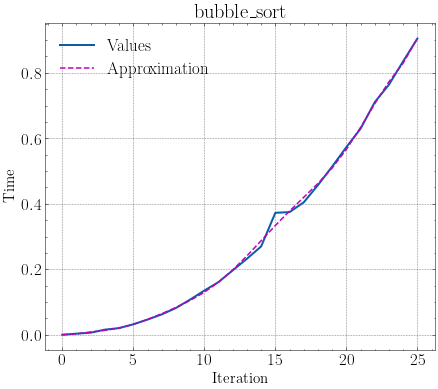

In [28]:
draw_plot(start=10, stop=1300, step=50, func=bubble_sort)

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="selection_sort" href="#content">Selection sort</a> (Сортировка методом простого выбора)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Самый естественный алгоритм сортировки. На пером шаге мы просматриваем весь список длины $n$, находим его наибольший элемент и помещаем его в конец списка. На следующем шаге мы находим наибольший элемент из всех оставшихся элементов (исключая последний) и помещаем его на предпоследнее место. И так далее, пока на последнем шаге нам не придётся определить, какой из двух оставшихся (первых двух) элементов больше другого.
</div>

$Time \ Complexity: O(n^2)$

$Space \ Complexity: O(1)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">Исходный список:

$$ [9, 1, 5, 10, 3, 8, 7, 2] $$
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">
$i = 0:$
$$ [9, 1, 5, \fbox{10}, 3, 8, 7, 2] $$
$$\downarrow$$
$$ [9, 1, 5, 2, 3, 8, 7, \underline{10}] $$

$i = 1:$
$$ [\fbox{9}, 1, 5, 2, 3, 8, 7, \underline{10}] $$
$$\downarrow$$
$$ [7, 1, 5, 2, 3, 8, \underline{9}, \underline{10}] $$

$i = 2:$
$$ [7, 1, 5, 2, 3, \fbox{8}, \underline{9}, \underline{10}] $$
$$\downarrow$$
$$ [7, 1, 5, 2, 3, \underline{8}, \underline{9}, \underline{10}] $$

$i = 3:$
$$ [\fbox{7}, 1, 5, 2, 3, \underline{8}, \underline{9}, \underline{10}] $$
$$\downarrow$$
$$ [3, 1, 5, 2, \underline{7}, \underline{8}, \underline{9}, \underline{10}] $$

$i = 4:$
$$ [3, 1, \fbox{5}, 2, \underline{7}, \underline{8}, \underline{9}, \underline{10}] $$
$$\downarrow$$
$$ [3, 1, 2, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}] $$

$i = 5:$
$$ [\fbox{3}, 1, 2, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}] $$
$$\downarrow$$
$$ [2, 1, \underline{3}, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}] $$

$i = 6:$
$$ [\fbox{2}, 1, \underline{3}, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}] $$
$$\downarrow$$
$$ [1, \underline{2}, \underline{3}, \underline{5}, \underline{7}, \underline{8}, \underline{9}, \underline{10}] $$
</div>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [10]:
def selection_sort(array: List[int]) -> None:
    n = len(array)
    for i in range(n-1, 0, -1):
        pos = 0
        for j in range(1, i+1):
            if array[j] > array[pos]:
                pos = j
        array[i], array[pos] = array[pos], array[i]

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [11]:
test_algo_inplace([9, 1, 5, 10, 3, 8, 7, 2], func=selection_sort)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

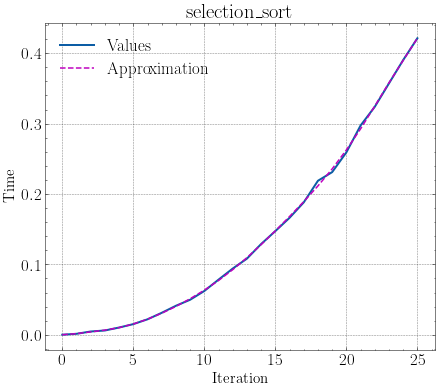

In [12]:
draw_plot(start=10, stop=1300, step=50, func=selection_sort)

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="insertion_sort" href="#content">Insertion sort</a> (Сортировка вставками)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
На каждом шаге мы добиваемся того, что первые $j$ элементов списка оказываются расположенными в порядке возрастания. Тогда, последовательно сравнивая элемент $a_{j+1}$ с элементами $a_{j}, a_{j-1}, ...$, как только мы обнаруживаем, что $a_{j+1} > a_{i}$, мы вставляем значение $a_{j+1}$ на $i$-е место в нашем списке.
</div>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
На первом шаге, сравнив $a_1$ с $a_2$ и, если оказалось, что $a_1 > a_2$, поменяв их местами, мы получим, что элементы $a_1$, $a_2$ расположены по возрастанию. На втором $-$ сравниваем $a_3$ сначала с $a_2$, и если оказалось, что $a_3 < a_2$, то сравниваем $a_3$ с $a_1$, в результате три первых элемента списка окажутся расположены по возрастанию. На последнем шаге, когда первые $n-1$ элементов уже расположены в порядке возрастания, мы вставляем на нужное место последний элемент списка.
</div>

$Time \ Complexity: O(n^2)$

$Space \ Complexity: O(1)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">Исходный список:

$$ [9, 1, 5, 10, 3, 8, 7, 2] $$
</div>

<div style="text-align: justify; font-family: 'Computer Modern Serif', serif; font-size: large;">
$i = 0:$
$$ [\fbox{9}, \underline{1}, 5, 10, 3, 8, 7, 2] $$
$$\downarrow$$
$$ [\fbox{1, 9}, 5, 2, 3, 8, 7, 10] $$

$i = 1:$
$$ [\fbox{1, 9}, \underline{5}, 2, 3, 8, 7, 10] $$
$$\downarrow$$
$$ [\fbox{1, 5, 9}, 2, 3, 8, 7, 10] $$

$i = 2:$
$$ [\fbox{1, 5, 9}, \underline{2}, 3, 8, 7, 10] $$
$$\downarrow$$
$$ [\fbox{1, 2, 5, 9}, 3, 8, 7, 10] $$

$i = 3:$
$$ [\fbox{1, 2, 5, 9}, \underline{3}, 8, 7, 10] $$
$$\downarrow$$
$$ [\fbox{1, 2, 3, 5, 9}, 8, 7, 10] $$

$i = 4:$
$$ [\fbox{1, 2, 3, 5, 9}, \underline{8}, 7, 10] $$
$$\downarrow$$
$$ [\fbox{1, 2, 3, 5, 8, 9}, 7, 10] $$

$i = 5:$
$$ [\fbox{1, 2, 3, 5, 8, 9}, \underline{7}, 10] $$
$$\downarrow$$
$$ [\fbox{1, 2, 3, 5, 7, 8, 9}, 10] $$

$i = 6:$
$$ [\fbox{1, 2, 3, 5, 7, 8, 9}, \underline{10}] $$
$$\downarrow$$
$$ [\fbox{1, 2, 3, 5, 7, 8, 9, 10}] $$
</div>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [13]:
def insertion_sort(array: List[int]) -> None:
    n = len(array)
    for i in range(1, n):
        pivot = array[i]
        j = i - 1
        while j >= 0 and array[j] > pivot:
            array[j+1] = array[j]
            j -= 1
        array[j+1] = pivot

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [14]:
test_algo_inplace([9, 1, 5, 10, 3, 8, 7, 2], func=insertion_sort)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

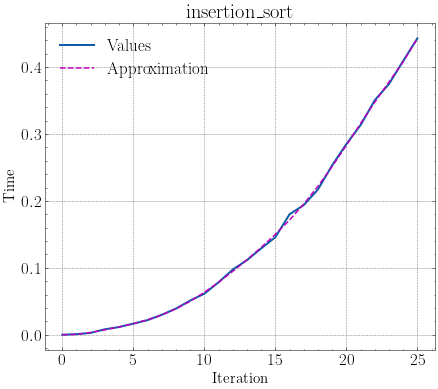

In [27]:
draw_plot(start=10, stop=1300, step=50, func=insertion_sort)

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="quicksort" href="#content">Quicksort</a> (Быстрая сортировка)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Пусть задан список $\{a_1, a_2, ..., a_n\}$ длины $n$. На первом шаге мы выбираем случайную позицию $k$, далее создаём два списка:<br>
1) $[g_1, g_2, \dots] \hspace{0.2cm} | \hspace{0.2cm} \forall g_j > a_k, j = \{1, \dots, m\}$<br>
2) $[l_1, l_2, \dots] \hspace{0.35cm} | \hspace{0.2cm} \forall l_r \leq a_k, r = \{1, \dots, p\}$<br>
</div>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Применяем к созданным спискам быстрый алгоритм сортировки до тех пор пока количество элементов в списках $> 1$. Затем конкатенируем списки следующим образом:

$$quicksort([l_1, l_2, \dots]) \sim [a_k] \sim quicksort([g_1, g_2, \dots])$$
</div>

$Time \ Complexity: O(n\log(n))$

$Space \ Complexity: O(\log(n))$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<img src="./assets/quicksort.png">

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [16]:
def quicksort(array: List[int]) -> List[int]:
    if len(array) < 2:
        return array
    n = len(array)
    pivot = random.choice(range(n))
    greater, lower = [], []
    for i in range(n):
        if pivot == i:
            continue
        if array[i] > array[pivot]:
            greater.append(array[i])
        else:
            lower.append(array[i])
    return quicksort(lower) + [array[pivot]] + quicksort(greater)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [17]:
test_algo_return([9, 1, 5, 10, 3, 8, 7, 2], func=quicksort)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

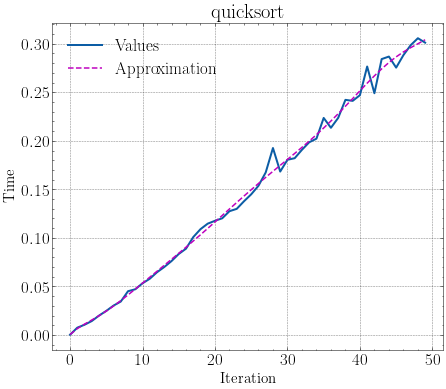

In [26]:
draw_plot(start=10, stop=10000, step=200, func=quicksort)

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="merge_sort" href="#content">Merge sort</a> (Сортировка слиянием)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Опишем прежде всего алгоритм слияния двух упорядоченных списков. Предположим, что списки $[a_1, a_2, \dots, a_n]$ и $[b_1, b_2, \dots, b_m]$ упорядочены по возрастанию. Сравним между собой элементы $a_1$ и $b_1$, выберем из них наименьший, удалим из соотвествующего списка и поставим первым в новый список. Сравним теперь первые элементы полученных списков, выберем из них наименьший и поставим вторым в новый список. И так далее, пока один из данных вначале списков не окажется пустым. Оставшуюся часть второго списка вставим в конец строящегося списка.
</div>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Теперь перейдём к описанию алгоритма сортировки. Для начала разделим исходный список на два списка, а затем каждый из них разделим ещё на два и так далее, пока количество элементов в списках $>1$. Далее упорядочим каждый из полученных списков и проведём слияние списков из первой пары и списков второй пары.
</div>

$Time \ Complexity: O(n\log(n))$

$Space \ Complexity: O(n)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<img src="./assets/merge_sort.png">

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [19]:
def merge_sort(array: List[int]) -> None:
    n = len(array)
    if n > 1:
        mid = n//2
        left = array[:mid]
        right = array[mid:]
        
        merge_sort(left)
        merge_sort(right)
        
        i = j = k = 0
        
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                array[k] = left[i]
                i += 1
            else:
                array[k] = right[j]
                j += 1
            k += 1
        
        while i < len(left):
            array[k] = left[i]
            i += 1
            k += 1
        
        while j < len(right):
            array[k] = right[j]
            j += 1
            k += 1

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [20]:
test_algo_inplace([9, 1, 5, 10, 3, 8, 7, 2], func=merge_sort)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

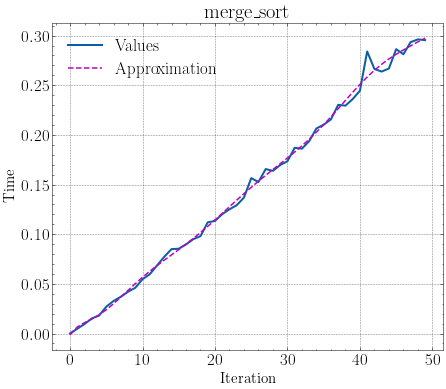

In [21]:
draw_plot(start=10, stop=10000, step=200, func=merge_sort)

<h3 style="font-family: 'Computer Modern Serif', serif;"><a id="heapsort" href="#content">Heapsort</a> (Пирамидальная сортировка, Сортировка при помощи двоичных куч)</h3>

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Описание</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Пусть задан список длины $n$. Прежде всего построим из него двоичную кучу. Далее будем действовать следующим образом. Наибольшим элементом в списке, являющимся двоичной кучей, является первый его элемент. Удалим его и перестроим образовавшийся список в двоичную кучу. Продолжая действовать аналогичным образом, мы и получим упорядоченный список, состоящий из элементов двоичной кучи.
</div>

<h4 style="font-family: 'Computer Modern Serif', serif;">Двоичная куча</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Двоичная куча, пирамида $-$ такое двоичное дерево, для которого выполнены три условия:
<ol>
    <li>Значение в любой вершине не меньше, чем значения её потомков.</li>
    <li>Глубина всех листьев (расстояние до корня) отличается не более чем на 1 слой.</li>
    <li>Последний слой заполняется слева направо без «дырок».</li>
</ol>
Удобная структура данных для сортирующего дерева $-$ массив $A$, у которого корневой элемент $-$ $a_{0}$, а потомки элемента $a_{i}$ $-$ $a_{2i+1}$ и $a_{2i+2}$.
При таком способе хранения условия 2 и 3 выполнены автоматически. 
</div>

<img src="./assets/binary_tree.png">

<img src="./assets/binary_heap.png">

<h4 style="font-family: 'Computer Modern Serif', serif;">Алгоритм построения двоичной кучи</h4>

<div style="text-align: justify; border: 1px solid #adb5bd; padding: 1rem; font-family: 'Computer Modern Serif', serif; font-size: large;">
Предположим, что имеется список из $n$ элементов, из которого требуется построить список, являющийся двоичной кучей. Расположим эти элементы в вершинах заполненного двоичного дерева. Теперь рассмотрим тройки элементов с номерами $i$, $2i$, $2i+1$, где вершина с номером $i$ лежит на предпоследнем уровне этого дерева. Если $a_i < \max\{a_{2i}, a_{2i+1}\}$, то поменяем местами соответсвующие значения так, чтобы значения всех элементов, лежащих в корнях деревьев высоты 1, были бы не меньше значений их потомков. Теперь перейдём на один уровень выше. На каждом шаге этого алгоритма предполагается, что являются двоичными кучами подпоследовательности данной последовательности, заданные двоичными поддеревьями исходного дерева с корнями во всех вершинах уровня $m$.
</div>

$Time \ Complexity: O(n\log(n))$

$Space \ Complexity: O(1)$

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Пример</h4>

<img src="./assets/heapsort.png">

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Реализация</h4>

In [22]:
def heapify(array, n, i):
    largest = i        # Initialize largest value as root
    left = 2*i+1       # Left child
    right = 2*i+2      # Right child

    # Check if left child of root is exists and is greater than root
    if left < n and array[i] < array[left]:
        largest = left
    
    # Check if right child of root is exists and is greater than root
    if right < n and array[largest] < array[right]:
        largest = right
    
    # Change root if needed
    if largest != i:
        array[i], array[largest] = array[largest], array[i]
        heapify(array, n, largest)    # Heapify the root

In [23]:
def heapsort(array: List[int]) -> None:
    n = len(array)
    
    # Building binary heap
    for i in range(n//2 - 1, -1, -1):
        heapify(array, n, i)
    
    # One by one extract elements
    for i in range(n-1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, i, 0)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">Тест</h4>

In [24]:
test_algo_inplace([9, 1, 5, 10, 3, 8, 7, 2], func=heapsort)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold;">График асимптотики</h4>

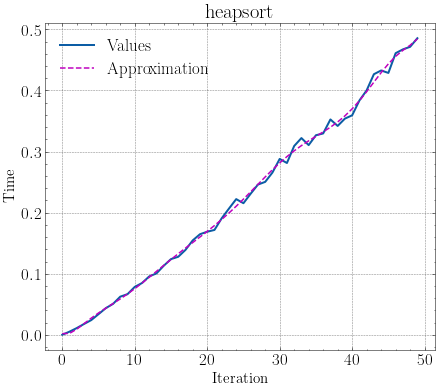

In [25]:
draw_plot(start=10, stop=10000, step=200, func=heapsort)

<h4 style="font-family: 'Computer Modern Serif', serif; font-weight: bold; text-align: center;"><a href="../index.html">⟵ Back</a></h4>